In [1]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


In [2]:
import shap
import joblib

pipeline = joblib.load("../models/full_pipeline.pkl")

c:\Users\nithi\Clinical-AI-System\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv("../data/processed/ckd_processed.csv")

X = df.drop(columns=["Class"])
y = df["Class"]


In [4]:
X_sample = X.sample(100, random_state=42)
preprocessor = pipeline.named_steps["preprocessor"]
model = pipeline.named_steps["model"]


In [5]:
X_transformed = preprocessor.transform(X)


In [14]:
explainer = shap.Explainer(model, X_transformed, feature_names=feature_names)
shap_values = explainer(X_transformed)


In [7]:
feature_names = preprocessor.get_feature_names_out()


In [10]:
shap_values.shape


(400, 14)

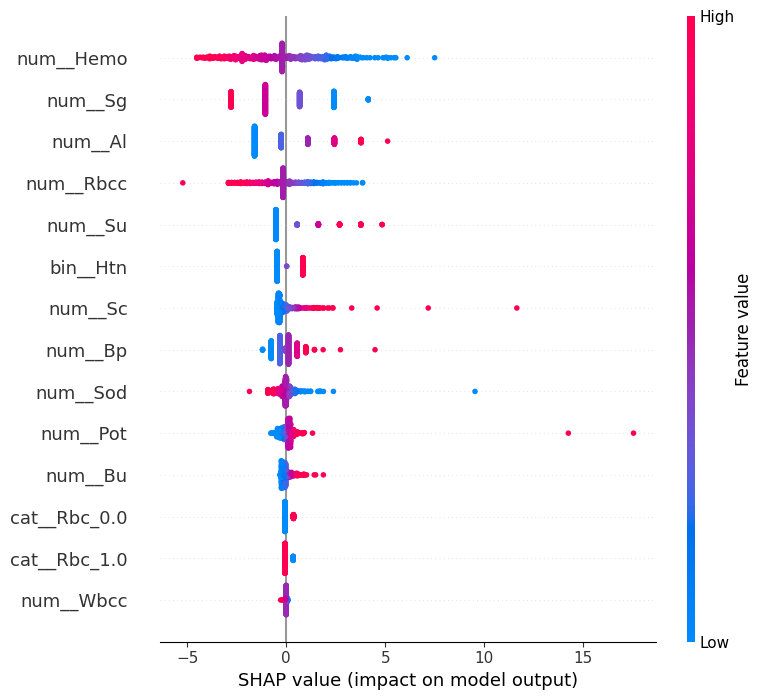

In [15]:
shap.summary_plot(
    shap_values,
    X_transformed,
    feature_names=feature_names
)


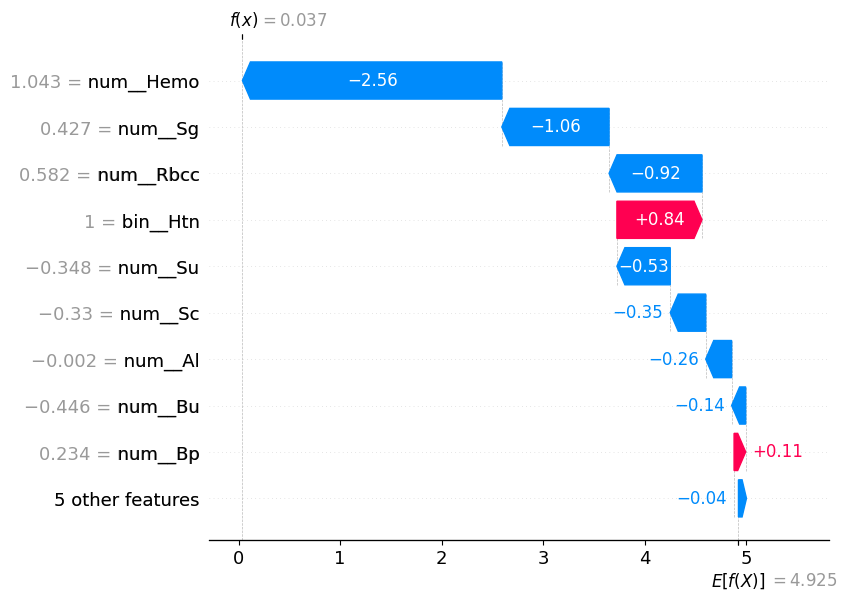

In [16]:
shap.plots.waterfall(shap_values[0])


In [ ]:
For binary classification, SHAP directly returns feature attributions for the positive class, eliminating the need for class-wise indexing.
Feature names were passed at explainer initialization to ensure compatibility with SHAP’s plotting API.
